## Beijing polution - Learning to work with multivariate time series

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [30]:
%matplotlib inline
sns.set_style('whitegrid')

In [31]:
data = pd.read_csv('./input/PRSA_data_2010.1.1-2014.12.31.csv')

In [32]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [33]:
data = pd.read_csv('./input/PRSA_data_2010.1.1-2014.12.31.csv',  
                   parse_dates = [['year', 'month', 'day', 'hour']], 
                   index_col=0, 
                   date_parser=lambda x: 
                   datetime.strptime(x, '%Y %m %d %H'))

In [34]:
data.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [35]:
data.drop('No', axis=1, inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [37]:
data.fillna(0, inplace=True)
data.isnull().any()

pm2.5    False
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

In [38]:
data.columns = ['pollution', 'dew', 'temp', 'press', 'wind_dir', 'wind_speed', 'snow', 'rain']
data.index.name = 'date'

In [39]:
data.head(30)

,pollution,dew,temp,press,wind_dir,wind_speed,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,0.0,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,0.0,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,0.0,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,0.0,-19,-9.0,1017.0,NW,24.15,0,0


In [40]:
data = data.iloc[24:]

In [41]:
data.head()

,pollution,dew,temp,press,wind_dir,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


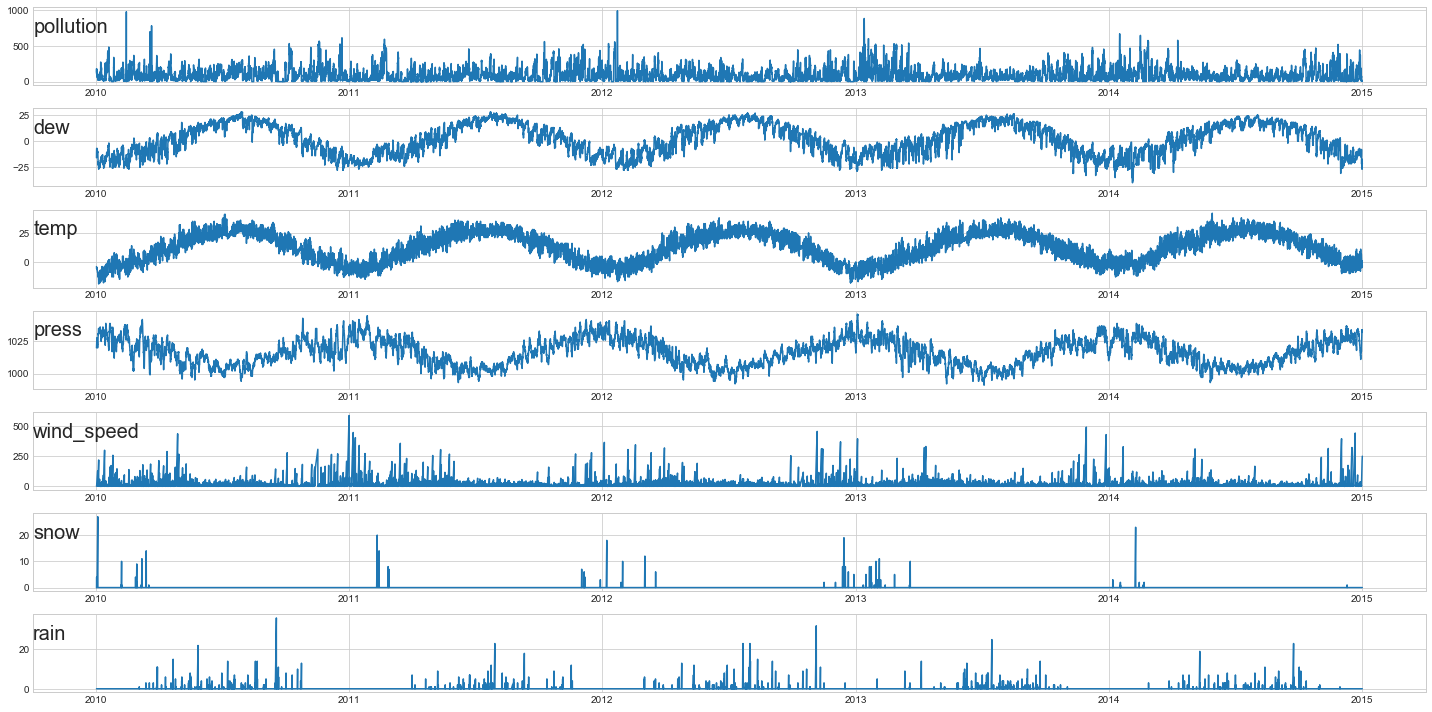

In [42]:
cont_cols = data.drop('wind_dir',axis=1).columns

plt.figure(figsize=(20,10))

for index, col in enumerate(cont_cols):
    plt.subplot(len(cont_cols), 1, index+1)
    plt.plot(data[col])
    plt.title(col, y=0.6, loc='left', fontsize=20)
    
plt.tight_layout()

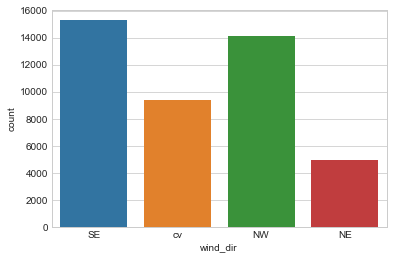

In [43]:
sns.countplot(data['wind_dir'])

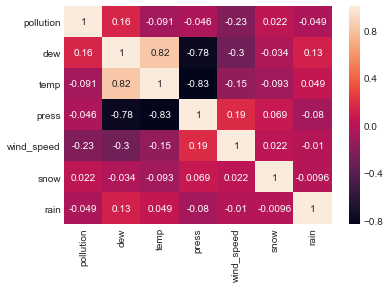

In [44]:
sns.heatmap(data.corr(), annot=True)

In [45]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [46]:
# extract values
values = data.values

# integer encode wind direction since it is categorical
le = LabelEncoder()

values[:,4] = le.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [66]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, var_names=[]):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    n_vars = 1 if type(data) is list else data.shape[1]

    if n_vars != len(var_names):
        print('Name mismatch, expected ', n_vars, ' got ', len(var_names))
        var_names = []
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        if var_names != []:
            names += [('{}(t-{})'.format(n, i)) for n in var_names]
        else:   
            names += [('var{}(t-{})'.format(j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)   
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('{}(t-{})'.format(n, i)) for n in var_names]
        else:
            names += [('var{}(t-{})'.format(j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
       
    return agg

In [67]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1, var_names=list(data.columns))

# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

reframed.head()

,pollution(t-1),dew(t-1),temp(t-1),press(t-1),wind_dir(t-1),wind_speed(t-1),snow(t-1),rain(t-1),pollution(t-0)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


In [21]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [22]:
from keras import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN

C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Models
Experimenting with different RNN-architectures and stacking them to see if it makes a difference.

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [23]:

# design network
model = Sequential()
#model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [24]:
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 5s - loss: 0.0604 - val_loss: 0.0530
Epoch 2/50
 - 3s - loss: 0.0327 - val_loss: 0.0531
Epoch 3/50
 - 3s - loss: 0.0188 - val_loss: 0.0345
Epoch 4/50
 - 3s - loss: 0.0166 - val_loss: 0.0244
Epoch 5/50
 - 3s - loss: 0.0159 - val_loss: 0.0207
Epoch 6/50
 - 3s - loss: 0.0155 - val_loss: 0.0185
Epoch 7/50
 - 3s - loss: 0.0153 - val_loss: 0.0174
Epoch 8/50
 - 3s - loss: 0.0152 - val_loss: 0.0171
Epoch 9/50
 - 3s - loss: 0.0149 - val_loss: 0.0146
Epoch 10/50
 - 3s - loss: 0.0149 - val_loss: 0.0148
Epoch 11/50
 - 3s - loss: 0.0150 - val_loss: 0.0147
Epoch 12/50
 - 3s - loss: 0.0149 - val_loss: 0.0148
Epoch 13/50
 - 3s - loss: 0.0148 - val_loss: 0.0152
Epoch 14/50
 - 3s - loss: 0.0148 - val_loss: 0.0142
Epoch 15/50
 - 3s - loss: 0.0148 - val_loss: 0.0149
Epoch 16/50
 - 3s - loss: 0.0148 - val_loss: 0.0148
Epoch 17/50
 - 3s - loss: 0.0149 - val_loss: 0.0147
Epoch 18/50
 - 3s - loss: 0.0148 - val_loss: 0.0146
Epoch 19/50
 - 3s - loss

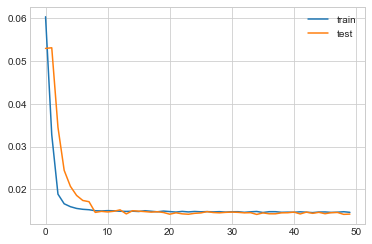

In [25]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

# invert scaling for forecast
y_pred_inv = np.concatenate((y_pred, X_test[:, 1:]), axis=1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)
y_pred_inv = y_pred_inv[:,0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
y_inv = np.concatenate((y_test, X_test[:, 1:]), axis=1)
y_inv = scaler.inverse_transform(y_inv)
y_inv = y_inv[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_inv, y_pred_inv))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 27.225


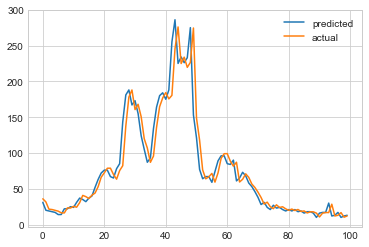

In [28]:
segment = range(0,100)

plt.plot(segment, y_inv[segment], label='predicted')
plt.plot(segment, y_pred_inv[segment], label='actual')
plt.plot()
plt.legend()